## Last Draft: Locke Patton, Oct 21

### TO DO
#### General
 - DONE Auto-create standard star ls .txt files
 - DONE filters = ['v','b','y']
 - importable functions
     - including table save function?

#### Plots
 - DONE Add legends to plots for v, b and y
 - DONE Make sure work for later cells

#### Solution to Stromgren missing data?
 - Try 2nd type of color-mag?
 - Standardization
  - DONE Correct Read-in of .mag files
  - DONE Best fits to v, b and y vs. X
  - DONE Write Standard Stars Mag, Merr, Airmass, Mean Files for each Standard Star.
  - DONE Add Best fits to StandardStars
  - DONE Choose Standard Stars Adjustment (i.e. positive slopes)
  - DONE Plot true mags vs. airmass corrected mags
  - Add equations to each plot
  - Add colorbars to plots
  - Add error bars to plots
  - Find v, b and y from inputted m1, b-y, B and V for each star.
  - Correct magnitudes
  - Add corrected mags to matched Phot file.

#### Saving files
 - DONE 2nd file path for saving files
  - DONE Make sure adjustment works
 - DONE an if verbose for all unnecissary prints
 
#### Time Containment
 - Adjust Phot and Trilegal Cells using np.where

In [1]:
from astropy.table import QTable, hstack
import numpy as np
import time
import datetime
import glob
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#AJUST FOR CLUSTER

cluster = 'Turner11_dao'           #Inside file names
cluster_title = 'Turner 11'  #For plot titles

path_in_cluster = r'/Users/amielpatton-hall/Desktop/Research/Larson/CLEAN3021/PYTHON/STROMGREN/'  #location of cluster .als files
path_in_standards = r'/Users/amielpatton-hall/Desktop/Research/Larson/CLEAN3021/PYTHON/STANDARDS/' #location of standard .mag files
path_out = r'/Users/amielpatton-hall/Desktop/Research/Larson/CLEAN3021/PYTHON/STROMGREN/'   #Files and plots saved here

verbose = 'yes'           #print extra info?
verbose_absolute = 'yes' #print important info?

In [3]:
#ONLY Refresh if completing different cycle and want new files
#Note if you refresh on same day, no change will occur

t = datetime.datetime.now()   #DATE + TIME specified in file name.

if verbose_absolute == 'yes':
    print 'output time seen in file names:',t.date()

output time seen in file names: 2016-11-07


In [4]:
!cd $path_in_standards"v"; ls *fits.mag* > v_standards_names.txt
!cd $path_in_standards"b"; ls *fits.mag* > b_standards_names.txt
!cd $path_in_standards"y"; ls *fits.mag* > y_standards_names.txt

if verbose=='yes':
    !cd $path_in_standards"v"; cat v_standards_names.txt
    !cd $path_in_standards"b"; cat b_standards_names.txt
    !cd $path_in_standards"y"; cat y_standards_names.txt

13Peg_dao_V_01.fits.mag.1
13Peg_dao_V_02.fits.mag.1
13Peg_dao_V_03.fits.mag.1
13Peg_dao_V_04.fits.mag.1
14Aries_dao_V_01.fits.mag.1
14Aries_dao_V_02.fits.mag.1
14Aries_dao_V_03.fits.mag.1
14Aries_dao_V_04.fits.mag.1
14Aries_dao_V_05.fits.mag.1
14Aries_dao_V_06.fits.mag.1
14Aries_dao_V_07.fits.mag.1
14Aries_dao_V_08.fits.mag.1
14Aries_dao_V_09.fits.mag.1
14Aries_dao_V_10.fits.mag.1
51Peg_dao_V_01.fits.mag.1
51Peg_dao_V_02.fits.mag.1
51Peg_dao_V_03.fits.mag.1
51Peg_dao_V_04.fits.mag.1
51Peg_dao_V_05.fits.mag.1
51Peg_dao_V_06.fits.mag.1
51Peg_dao_V_07.fits.mag.1
51Peg_dao_V_08.fits.mag.1
85Peg_dao_V_01.fits.mag.1
85Peg_dao_V_02.fits.mag.1
85Peg_dao_V_03.fits.mag.1
85Peg_dao_V_04.fits.mag.1
85Peg_dao_V_05.fits.mag.1
85Peg_dao_V_06.fits.mag.1
85Peg_dao_V_07.fits.mag.1
85Peg_dao_V_08.fits.mag.1
85Peg_dao_V_09.fits.mag.1
85Peg_dao_V_10.fits.mag.1
85Peg_dao_V_11.fits.mag.1
13Peg_dao_B_01.fits.mag.1
13Peg_dao_B_02.fits.mag.1
13Peg_dao_B_03.fits.mag.1
13Peg_dao_B_04.fits.mag.1
14Aries_dao_B_01.f

In [32]:
filters = ['v','b','y']
Standards = {}
for filter_ in filters:

    stands = np.genfromtxt(path_in_standards+filter_+'/'+filter_+'_standards_names.txt',dtype=None)
    if verbose == 'yes':
        print stands
        
    Standards[filter_]={}
    Standards[filter_]['file']=[]
    Standards[filter_]['mag']=[]
    Standards[filter_]['merr']=[]
    Standards[filter_]['airmass']=[]
    Standards[filter_]['mean']=[]

    #file name, magnitude and magnitude error found.
    #(This code can be adapted to include anything in mag files - see below for correct dtype and intertoools.islice)
    for file_ in enumerate(stands):
        Standards[filter_]['file'].append(file_[1])
        mag = glob.glob(path_in_standards + filter_+'/'+file_[1])
        with open(mag[0]) as f_in:
            mag_line5 = np.genfromtxt(itertools.islice(f_in, 79, None, 5),autostrip=True, # skip_header=75,
                                  dtype=[('RAPERT', '<f8'), ('SUM', '<f8'),('AREA', '<f8'),('FLUX', '<f8'),
                                         ('MAG', '<f8'), ('MERR', '<f8'),('PIER', '<f8'),('PERROR', '<f8')])
            Standards[filter_]['mag'].append(float(mag_line5['MAG']))
            Standards[filter_]['merr'].append(float(mag_line5['MERR']))

    #adding airmass
    Standards_airmass = np.genfromtxt(path_in_standards+filter_+'/'+filter_+'_airmass.txt',dtype=None)
        
    #adding mean value imstat
    Standards_mean = np.genfromtxt(path_in_standards+filter_+'/'+filter_+'_imstat_mean.txt',dtype=None)
#     Standards_mean = QTable.read(path_in_standards+filter_+'/'+filter_+r'_imstat_mean.txt',format='ascii')

    for i in range(len(Standards_airmass)):
        Standards[filter_]['airmass'].append(Standards_airmass[i])
        Standards[filter_]['mean'].append(Standards_mean[i])

    SaveStandards = QTable()
    SaveStandards['file']=Standards[filter_]['file']
    SaveStandards['mag']=Standards[filter_]['mag']
    SaveStandards['merr']=Standards[filter_]['merr']
    SaveStandards['airmass']=Standards[filter_]['airmass']
    SaveStandards['mean']=Standards[filter_]['mean']
    SaveStandards.write(path_out + cluster +'_'+ str(t.date())+'_Standard_Stars_'+filter_+'.txt', format='ascii')
    del SaveStandards
    
    if verbose == 'yes':
        print 'Saved:', cluster +'_'+ str(t.date())+'_Standard_Stars_'+filter_+'.txt'
        print ''
        
#printing lengths
if verbose_absolute == 'yes':
    print 'b:','#files',len(Standards['b']['file']),'# mags',len(Standards['b']['mag']),'# mag errors',len(Standards['b']['merr']),'# airmass',len(Standards['b']['airmass']),'# airmass',len(Standards['b']['mean'])
    print 'v:','#files',len(Standards['v']['file']),'# mags',len(Standards['v']['mag']),'# mag errors',len(Standards['v']['merr']),'# airmass',len(Standards['v']['airmass']),'# airmass',len(Standards['v']['mean'])
    print 'y:','#files',len(Standards['y']['file']),'# mags',len(Standards['y']['mag']),'# mag errors',len(Standards['y']['merr']),'# airmass',len(Standards['y']['airmass']),'# airmass',len(Standards['y']['mean'])

if verbose == 'yes':
    print ''
    print Standards
    

#All Information broadcast in mag files and #lines / dtype / intertools.isclice lines of code to read them in.
#N IMAGE               XINIT     YINIT     ID    COORDS                 LID    \
#U imagename           pixels    pixels    ##    filename               ##     \
#7 lines  (12448.0, 430.81, 465.01, 1.0, nan, 1.0, nan)     
#itertools.islice(f_in, 75, None, 5)   #5 is just to make sure it skips past the total # of lines. 75 is starting line. None means it doesn't end.
#                               dtype=[('IMAGE', '<f8'),('XINIT', '<f8'), ('YINIT', '<f8'),('ID', '<f8'),('Nan1', '<f8'), ('COORDS', '<f8'),('Nan2', '<f8')])

#N XCENTER    YCENTER    XSHIFT  YSHIFT  XERR    YERR            CIER CERROR   \
#U pixels     pixels     pixels  pixels  pixels  pixels          ##   cerrors  \
#7 lines (431.386, 463.797, 0.576, -1.213, 0.001, 0.001, 107.0)     
#itertools.islice(f_in, 76, None, 5)
#                               dtype=[('XCENTER', '<f8'), ('YCENTER', '<f8'),('XSHIFT', '<f8'),('YSHIFT', '<f8'),('XERR', '<f8'), ('YERR', '<f8'),('CIER', '<f8')])

#N MSKY           STDEV          SSKEW          NSKY   NSREJ     SIER SERROR   \
#U counts         counts         counts         npix   npix      ##   serrors  \
#6 lines (60.20601, 2.79533, 1.056994, 2795.0, 27.0, 0.0)     
#itertools.islice(f_in, 77, None, 5)
#                               dtype=[('MSKY', '<f8'), ('STDEV', '<f8'),('SSKEW', '<f8'),('NSKY', '<f8'),('NSREJ', '<f8'), ('SIER', '<f8')])

#N ITIME          XAIRMASS       IFILTER                OTIME                  \
#U timeunit       number         name                   timeunit               \
#4 lines (1.0, nan, nan, nan)
#itertools.islice(f_in, 78, None, 5)
#                               dtype=[('ITIME', '<f8'), ('XAIRMASS', '<f8'),('IFILTER', '<f8'),('OTIME', '<f8')])

#N RAPERT   SUM           AREA       FLUX          MAG    MERR   PIER PERROR   \
#U scale    counts        pixels     counts        mag    mag    ##   perrors  \
#8 lines (14.6, 2385199.0, 669.9021, 2344867.0, 9.075, 0.001, 0.0, nan)
#itertools.islice(f_in, 79, None, 5)
#                               dtype=[('RAPERT', '<f8'), ('SUM', '<f8'),('AREA', '<f8'),('FLUX', '<f8'),('MAG', '<f8'), ('MERR', '<f8'),('PIER', '<f8'),('PERROR', '<f8')])

['13Peg_dao_V_01.fits.mag.1' '13Peg_dao_V_02.fits.mag.1'
 '13Peg_dao_V_03.fits.mag.1' '13Peg_dao_V_04.fits.mag.1'
 '14Aries_dao_V_01.fits.mag.1' '14Aries_dao_V_02.fits.mag.1'
 '14Aries_dao_V_03.fits.mag.1' '14Aries_dao_V_04.fits.mag.1'
 '14Aries_dao_V_05.fits.mag.1' '14Aries_dao_V_06.fits.mag.1'
 '14Aries_dao_V_07.fits.mag.1' '14Aries_dao_V_08.fits.mag.1'
 '14Aries_dao_V_09.fits.mag.1' '14Aries_dao_V_10.fits.mag.1'
 '51Peg_dao_V_01.fits.mag.1' '51Peg_dao_V_02.fits.mag.1'
 '51Peg_dao_V_03.fits.mag.1' '51Peg_dao_V_04.fits.mag.1'
 '51Peg_dao_V_05.fits.mag.1' '51Peg_dao_V_06.fits.mag.1'
 '51Peg_dao_V_07.fits.mag.1' '51Peg_dao_V_08.fits.mag.1'
 '85Peg_dao_V_01.fits.mag.1' '85Peg_dao_V_02.fits.mag.1'
 '85Peg_dao_V_03.fits.mag.1' '85Peg_dao_V_04.fits.mag.1'
 '85Peg_dao_V_05.fits.mag.1' '85Peg_dao_V_06.fits.mag.1'
 '85Peg_dao_V_07.fits.mag.1' '85Peg_dao_V_08.fits.mag.1'
 '85Peg_dao_V_09.fits.mag.1' '85Peg_dao_V_10.fits.mag.1'
 '85Peg_dao_V_11.fits.mag.1']
Saved: kron5_dao_2016-11-07_Standard_S

In [30]:
if verbose == 'yes':
    print 'All v'
    !cd $path_in_standards'v'; ls *fits.mag*
    print 'All b'
    !cd $path_in_standards'b'; ls *fits.mag*
    print 'All y'
    !cd $path_in_standards'y'; ls *fits.mag*

All v
13Peg_dao_V_01.fits.mag.1   51Peg_dao_V_04.fits.mag.1
13Peg_dao_V_02.fits.mag.1   51Peg_dao_V_05.fits.mag.1
13Peg_dao_V_03.fits.mag.1   51Peg_dao_V_06.fits.mag.1
13Peg_dao_V_04.fits.mag.1   51Peg_dao_V_07.fits.mag.1
14Aries_dao_V_01.fits.mag.1 51Peg_dao_V_08.fits.mag.1
14Aries_dao_V_02.fits.mag.1 85Peg_dao_V_01.fits.mag.1
14Aries_dao_V_03.fits.mag.1 85Peg_dao_V_02.fits.mag.1
14Aries_dao_V_04.fits.mag.1 85Peg_dao_V_03.fits.mag.1
14Aries_dao_V_05.fits.mag.1 85Peg_dao_V_04.fits.mag.1
14Aries_dao_V_06.fits.mag.1 85Peg_dao_V_05.fits.mag.1
14Aries_dao_V_07.fits.mag.1 85Peg_dao_V_06.fits.mag.1
14Aries_dao_V_08.fits.mag.1 85Peg_dao_V_07.fits.mag.1
14Aries_dao_V_09.fits.mag.1 85Peg_dao_V_08.fits.mag.1
14Aries_dao_V_10.fits.mag.1 85Peg_dao_V_09.fits.mag.1
51Peg_dao_V_01.fits.mag.1   85Peg_dao_V_10.fits.mag.1
51Peg_dao_V_02.fits.mag.1   85Peg_dao_V_11.fits.mag.1
51Peg_dao_V_03.fits.mag.1
All b
13Peg_dao_B_01.fits.mag.1   51Peg_dao_B_05.fits.mag.1
13Peg_dao_B_02.fits.mag.1   51Peg_dao_B_06.f

In [36]:
#determine star names for imput (from inside file names)
star1 = '13Peg'
star2 = '14Aries'
star3 = '51Peg'
star4 = '85Peg'

Stars = [star1,star2,star3,star4]

star1_vby_truemag = [5.344,5.699,5.344]
star2_vby_truemag = [5.302,4.983,5.302]
star3_vby_truemag = [5.46,6.16,5.46]
star4_vby_truemag = [5.75,6.42,5.75]

if verbose == 'yes':
    for star in Stars:
        print star1
        for filter_ in filters:
            !ls $path_in_standards$filter_/$star*fits |wc

13Peg
       4       4     388
       4       4     388
       4       4     388
13Peg
      10      10     990
       8       8     792
       9       9     891
13Peg
       8       8     776
       8       8     776
       8       8     776
13Peg
      11      11    1067
      11      11    1067
      11      11    1067


In [37]:
#Adjusting to Star Separated Indecies

StandardStars = {}
for star in Stars:
    StandardStars[star]={}

for star in Stars:
    for filter_ in filters:
        StandardStars[star][filter_]={}
        StandardStars[star][filter_]['file']=[]
        StandardStars[star][filter_]['mag']=[]
        StandardStars[star][filter_]['merr']=[]
        StandardStars[star][filter_]['airmass']=[]
        StandardStars[star][filter_]['mean']=[]
        StandardStars[star][filter_]['standardmag']=[]
        
StarMags = [star1_vby_truemag,star2_vby_truemag,star3_vby_truemag,star4_vby_truemag]
for star_mag, star in zip(StarMags, Stars):
    for filter_ in enumerate(filters):
        StandardStars[star][filter_[1]]['standardmag']=star_mag[filter_[0]]

for star in Stars:
    for filter_ in filters:
        Standards_star_filter = [pos for pos, s in enumerate(Standards[filter_]['file']) if star in s]
        for index in Standards_star_filter:
            StandardStars[star][filter_]['mean'].append(Standards[filter_]['mean'][index])
            StandardStars[star][filter_]['file'].append(Standards[filter_]['file'][index])
            StandardStars[star][filter_]['mag'].append(Standards[filter_]['mag'][index])
            StandardStars[star][filter_]['merr'].append(Standards[filter_]['merr'][index])
            StandardStars[star][filter_]['airmass'].append(Standards[filter_]['airmass'][index])

if verbose_absolute == 'yes':
    for star in Stars:
        print star,':'
        for filter_ in filters:
            print filter_,':'
            print filter_,'file lengths:', len(StandardStars[star]['v']['file']),len(StandardStars[star]['v']['mag']),len(StandardStars[star]['v']['merr']),len(StandardStars[star]['v']['airmass']),len(StandardStars[star]['v']['mean'])
            print [s for s in Standards[filter_]['file'] if star in s]
        print ''

if verbose == 'yes':
    print ''
    print StandardStars

13Peg :
v :
v file lengths: 4 4 4 4 4
['13Peg_dao_V_01.fits.mag.1', '13Peg_dao_V_02.fits.mag.1', '13Peg_dao_V_03.fits.mag.1', '13Peg_dao_V_04.fits.mag.1']
b :
b file lengths: 4 4 4 4 4
['13Peg_dao_B_01.fits.mag.1', '13Peg_dao_B_02.fits.mag.1', '13Peg_dao_B_03.fits.mag.1', '13Peg_dao_B_04.fits.mag.1']
y :
y file lengths: 4 4 4 4 4
['13Peg_dao_Y_01.fits.mag.1', '13Peg_dao_Y_02.fits.mag.1', '13Peg_dao_Y_03.fits.mag.1', '13Peg_dao_Y_04.fits.mag.1']

14Aries :
v :
v file lengths: 10 10 10 10 10
['14Aries_dao_V_01.fits.mag.1', '14Aries_dao_V_02.fits.mag.1', '14Aries_dao_V_03.fits.mag.1', '14Aries_dao_V_04.fits.mag.1', '14Aries_dao_V_05.fits.mag.1', '14Aries_dao_V_06.fits.mag.1', '14Aries_dao_V_07.fits.mag.1', '14Aries_dao_V_08.fits.mag.1', '14Aries_dao_V_09.fits.mag.1', '14Aries_dao_V_10.fits.mag.1']
b :
b file lengths: 10 10 10 10 10
['14Aries_dao_B_01.fits.mag.1', '14Aries_dao_B_02.fits.mag.1', '14Aries_dao_B_03.fits.mag.1', '14Aries_dao_B_04.fits.mag.1', '14Aries_dao_B_05.fits.mag.1', '14

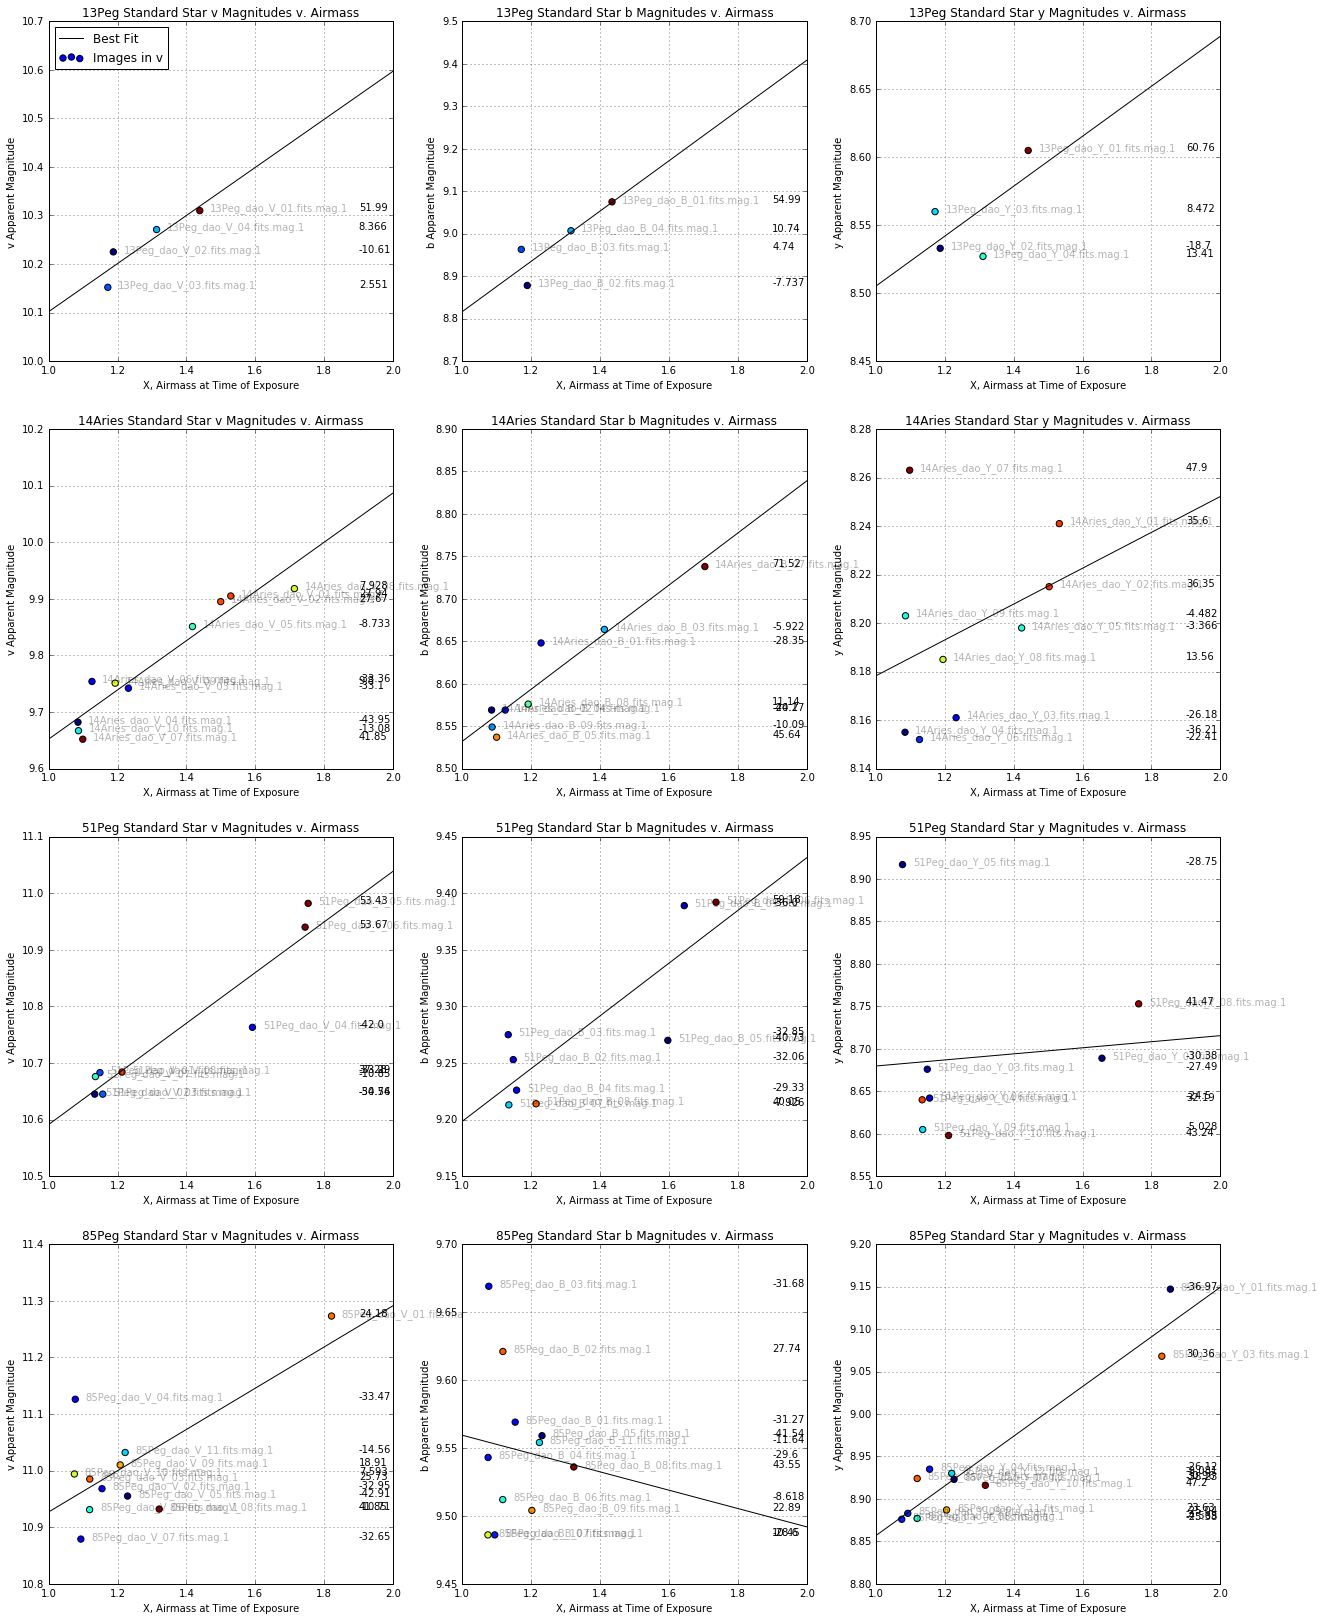

In [41]:
fig,ax = plt.subplots(len(Stars),len(filters))
fig.set_size_inches(7*len(filters),7*len(Stars))

for filter_ in enumerate(filters):
    for star in enumerate(Stars):
        x = StandardStars[star[1]][filter_[1]]['airmass']
        y = StandardStars[star[1]][filter_[1]]['mag']
        col = StandardStars[star[1]][filter_[1]]['mean']
        area = StandardStars[star[1]][filter_[1]]['merr']
        file_ = StandardStars[star[1]][filter_[1]]['file']

        ax[star[0],filter_[0]].grid(True)
        ax[star[0],filter_[0]].set_xlim(1,2)
        ax[star[0],filter_[0]].set_title(star[1]+ ' Standard Star '+ filter_[1] +' Magnitudes v. Airmass')
        ax[star[0],filter_[0]].set_xlabel('X, Airmass at Time of Exposure',)
        ax[star[0],filter_[0]].set_ylabel( filter_[1] + ' Apparent Magnitude')

        #adding the standard star fit for each filter
        star_fit = np.polyfit(x,y,1)
        star_fit_fn = np.poly1d(star_fit)

        starfit_x = np.linspace(1,2,100)
        ax[star[0],filter_[0]].plot(starfit_x, star_fit_fn(starfit_x),'-k',label='Best Fit')    #Best fit plotted from airmass X=1 to 2
        ax[star[0],filter_[0]].scatter(x, y, c=col, s=40, alpha=1, label='Images in v', cmap=plt.cm.jet);     #image points

        for file_index in enumerate(file_):
            ax[star[0],filter_[0]].annotate(file_index[1],(x[file_index[0]]+.03, y[file_index[0]]),fontsize=10,alpha=.3);     #annotated file names
        for mean_index in enumerate(col):
            ax[star[0],filter_[0]].annotate(mean_index[1],(1.9, y[mean_index[0]]),fontsize=10,alpha=1);     #annotated mean values

        StandardStars[star[1]][filter_[1]]['best_fit'] = star_fit

ax[0,0].legend(loc=2, numpoints=1);     #legend in top left

fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_standard_stars_vby_vs_X.jpg', bbox_inches='tight')

In [21]:
#writing Standard Stars Fit Constants
v_k_fit = []
v_v0_fit = []
b_k_fit = []
b_b0_fit = []
y_k_fit = []
y_y0_fit = []

for star in Stars:
    v_k_fit.append(StandardStars[star]['v']['best_fit'][0])
    v_v0_fit.append(StandardStars[star]['v']['best_fit'][1])
    b_k_fit.append(StandardStars[star]['b']['best_fit'][0])
    b_b0_fit.append(StandardStars[star]['b']['best_fit'][1])
    y_k_fit.append(StandardStars[star]['y']['best_fit'][0])
    y_y0_fit.append(StandardStars[star]['y']['best_fit'][1])

fits=QTable()
fits['Standard_Star']=Stars
fits['k_fit_v']= v_k_fit
fits['k_fit_b']= b_k_fit
fits['k_fit_y']= y_k_fit
fits['v0_fit_v']= v_v0_fit
fits['b0_fit_b']= b_b0_fit
fits['y0_fit_y']= y_y0_fit
fits.write(path_out + cluster +'_'+ str(t.date())+'_Standard_Stars_Fit_Constants.txt', format='ascii')

fits

Standard_Star,k_fit_v,k_fit_b,k_fit_y,v0_fit_v,b0_fit_b,y0_fit_y
str7,float64,float64,float64,float64,float64,float64
13Peg,0.495871433556,0.592299476109,0.183978416928,9.6057887047,8.2239393444,8.32109338694
14Aries,0.435185372344,0.306839883718,0.0739512788614,9.21679022001,8.2252085614,8.10427659984
51Peg,0.447700274031,0.232898730758,0.0357726645981,10.1434839561,8.9655270421,8.6440084266
85Peg,0.364631797246,-0.0674791365502,0.2927175028,10.5621903093,9.62687031013,8.56392248233


In [27]:
print 'all stars:', Stars
print ''

good_v_stars = [0,1,2,3]   #Change these to include specific stars (in the order of Stars selected)
good_b_stars = [0,1,2]
good_y_stars = [0,1,3]

k_v = [s for i,s in enumerate(v_k_fit) if i in good_v_stars]
k_b = [s for i,s in enumerate(b_k_fit) if i in good_b_stars]
k_y = [s for i,s in enumerate(y_k_fit) if i in good_y_stars]
v0 = [s for i,s in enumerate(v_v0_fit) if i in good_v_stars]
b0 = [s for i,s in enumerate(b_b0_fit) if i in good_b_stars]
y0 = [s for i,s in enumerate(y_y0_fit) if i in good_y_stars]

print 'v stars to be used:',[s for i,s in enumerate(Stars) if i in good_v_stars]
print k_v
print 'b stars to be used:',[s for i,s in enumerate(Stars) if i in good_b_stars]
print k_b
print 'y stars to be used:',[s for i,s in enumerate(Stars) if i in good_y_stars]
print k_y

k_v = np.mean(k_v)
k_b = np.mean(k_b)
k_y = np.mean(k_y)

print ''
print 'k_v', k_v
print 'k_b', k_b
print 'k_y', k_y
print 'v0', v0
print 'b0', b0
print 'y0', y0

all stars: ['13Peg', '14Aries', '51Peg', '85Peg']

v stars to be used: ['13Peg', '14Aries', '51Peg', '85Peg']
[0.49587143355573399, 0.43518537234439936, 0.44770027403063534, 0.36463179724562134]
b stars to be used: ['13Peg', '14Aries', '51Peg']
[0.59229947610900091, 0.30683988371751714, 0.23289873075792772]
y stars to be used: ['13Peg', '14Aries', '85Peg']
[0.18397841692819875, 0.073951278861382391, 0.29271750280008002]

k_v 0.435847219294
k_b 0.377346030195
k_y 0.183549066197
v0 [9.6057887047016113, 9.2167902200134559, 10.143483956133416, 10.562190309341894]
b0 [8.223939344401721, 8.225208561402491, 8.9655270421022308]
y0 [8.321093386942799, 8.1042765998400963, 8.5639224823344513]


[9.6057887047016113, 9.2167902200134559, 10.143483956133416, 10.562190309341894]
[5.344, 5.302, 5.46, 5.75]
[8.223939344401721, 8.225208561402491, 8.9655270421022308, 9.6268703101322046]
[5.699, 4.983, 6.16, 6.42]
[8.321093386942799, 8.1042765998400963, 8.6440084266011041, 8.5639224823344513]
[5.344, 5.302, 5.46, 5.75]


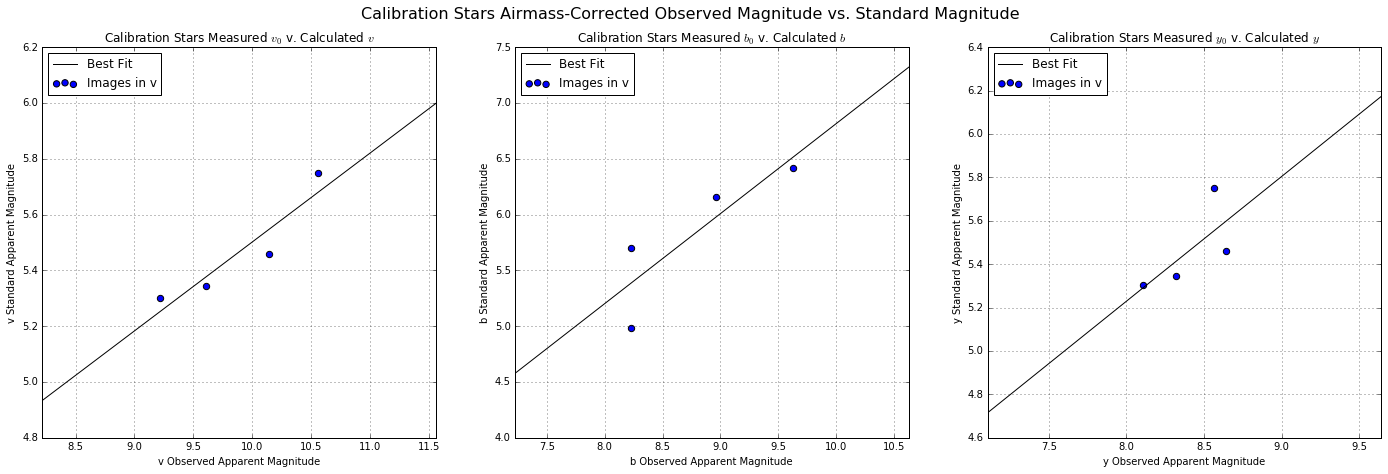

In [26]:
#Plotting X=0 measured magnitudes vs. true magnitudes
fig,ax = plt.subplots(1,len(filters))
fig.set_size_inches(8*len(filters),7)

fig.suptitle('Calibration Stars Airmass-Corrected Observed Magnitude vs. Standard Magnitude',fontsize='16')
Mag0=[v_v0_fit,b_b0_fit,y_y0_fit]

for filter_ in enumerate(filters):
    x_mag = []
    y_standardmag = []
    for star in enumerate(Stars):
        x_mag.append(Mag0[filter_[0]][star[0]])
        y_standardmag.append(StandardStars[star[1]][filter_[1]]['standardmag'])
    
    if verbose == 'yes':
        print x_mag
        print y_standardmag
    
    ax[filter_[0]].grid(True)
    ax[filter_[0]].set_title('Calibration Stars Measured $%s_{0}$ v. Calculated $%s$' % (filter_[1],filter_[1]))
    ax[filter_[0]].set_xlim(np.min(x_mag)-1,np.max(x_mag)+1)
    ax[filter_[0]].set_xlabel(filter_[1] + ' Observed Apparent Magnitude')
    ax[filter_[0]].set_ylabel(filter_[1] + ' Standard Apparent Magnitude')

    #making a mag vs standard mag fit for each filter
    standard_star_fit = np.polyfit(x_mag,y_standardmag,1)
    standard_star_fit_fn = np.poly1d(standard_star_fit)
    
    standard_x = np.linspace(np.min(x_mag)-1,np.max(x_mag)+1,100)
    ax[filter_[0]].plot(standard_x, standard_star_fit_fn(standard_x),'-k',label='Best Fit')
    
    ax[filter_[0]].scatter(x_mag, y_standardmag, c='b', s=40, alpha=1, label='Images in v', cmap=plt.cm.jet);
    ax[filter_[0]].legend(loc=2, numpoints=1);

# fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_standard_stars_mag_vs_standard_mag.jpg', bbox_inches='tight')

In [4]:
if verbose == 'yes':
    !ls
    !pwd
    !ls $path_in_standards*

ASTR481_Phot_match.py.ipynb
AnaPhot_backup_limits_2016-09-04T13:51:50.538368.txt
AnaPhot_backup_probability_2016-09-04T13:51:50.538368.txt
AnaPhot_fieldstars_2016-09-04T13:51:50.538368.txt
AnaPhot_out3sig_2016-09-04T13:51:50.538368.txt
AnaPhot_outcluster_2016-09-04T13:51:50.538368.txt
CleanCluster_Stromgren_v2.ipynb
CleanCluster_Stromgren_v4.ipynb
CleanCluster_Stromgren_v5.ipynb
CleanCluster_Stromgren_v6.ipynb
CleanCluster_Stromgren_v7.ipynb
Phot.sort
Turner11_b
Turner11_dao_b.fits.als.1
Turner11_dao_v.fits.als.1
Turner11_dao_y.fits.als.1
Turner11_v
Turner11_y
als_bvy_align.py.ipynb
kron5_dao_2016-09-18_backup_limits.txt
kron5_dao_2016-09-18_backup_probability.txt
kron5_dao_2016-09-18_fieldstars.txt
kron5_dao_2016-09-18_matched_phot.txt
kron5_dao_2016-09-18_out3sig.txt
kron5_dao_2016-09-18_outcluster.txt
kron5_dao_2016-09-18_plot_colmag_single.jpg
kron5_dao_2016-09-18_plot_colmag_tri_cluster.jpg
kron5_dao_2016-09-18_plot_colmag_triple.jpg
kron5_dao_2016-09-18_plot_metallicity_single.jp

In [7]:
#Reading in Open Cluster Field Data Files
# Turner11_dao_b.fits.als.1

als_b = glob.glob(path_in_cluster + cluster + '_b.fits.als.1')
als_v = glob.glob(path_in_cluster + cluster + '_v.fits.als.1')
als_y = glob.glob(path_in_cluster + cluster + '_y.fits.als.1')

if verbose == 'yes':
    print als_b
    print als_v
    print als_y
    
with open(als_b[0]) as f_in:
    als_b = np.genfromtxt(itertools.islice(f_in, 0, None, 2), dtype=[('ID', '<f8'), ('XCENTER', '<f8'),('YCENTER', '<f8'),('MAG', '<f8'),('MERR', '<f8'), ('MSKY', '<f8'),('NITER', '<f8')])
with open(als_v[0]) as f_in:
    als_v = np.genfromtxt(itertools.islice(f_in, 0, None, 2), dtype=[('ID', '<f8'), ('XCENTER', '<f8'),('YCENTER', '<f8'),('MAG', '<f8'),('MERR', '<f8'), ('MSKY', '<f8'),('NITER', '<f8')])
with open(als_y[0]) as f_in:
    als_y = np.genfromtxt(itertools.islice(f_in, 0, None, 2), dtype=[('ID', '<f8'), ('XCENTER', '<f8'),('YCENTER', '<f8'),('MAG', '<f8'),('MERR', '<f8'), ('MSKY', '<f8'),('NITER', '<f8')])

if verbose_absolute == 'yes':
    print '# b stars',len(als_b['XCENTER'])
    print '# v stars',len(als_v['XCENTER'])
    print '# y stars',len(als_y['XCENTER'])

#Shifts between files - (imalign values).
v_y_dx = 0                #average value of xcenter in v - average value xcenter in y
v_y_dy = 0                #average value of ycenter in v - average value ycenter in y
b_y_dx = 0                #average value of xcenter in b - average value xcenter in y
b_y_dy = 0                #average value of ycenter in b - average value ycenter in y

argmin

['/Users/amielpatton-hall/Desktop/Research/Larson/CLEAN3021/PYTHON/STROMGREN/Turner11_dao_b.fits.als.1']
['/Users/amielpatton-hall/Desktop/Research/Larson/CLEAN3021/PYTHON/STROMGREN/Turner11_dao_v.fits.als.1']
['/Users/amielpatton-hall/Desktop/Research/Larson/CLEAN3021/PYTHON/STROMGREN/Turner11_dao_y.fits.als.1']
# b stars 823
# v stars 724
# y stars 1450


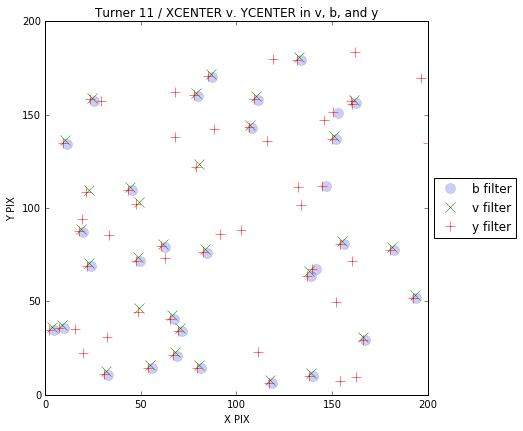

In [8]:
#Shift values correction Test plot

fig,ax = plt.subplots(1,1)
fig.tight_layout()
fig.set_size_inches(6,6)
ax.set_xlim(0,200)
ax.set_ylim(0,200)
ax.set_title(cluster_title + ' / XCENTER v. YCENTER in v, b, and y')
ax.set_xlabel('X PIX')
ax.set_ylabel('Y PIX')
ax.plot(als_b['XCENTER'],als_b['YCENTER'],marker='o',markersize='10',linestyle='',alpha=.2,label='b filter');
ax.plot(als_v['XCENTER'],als_v['YCENTER'],marker='x',markersize='10',linestyle='',label='v filter');
ax.plot(als_y['XCENTER'],als_y['YCENTER'],marker='+',markersize='10',linestyle='',label='y filter');
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1);

#Check that shift values worked and stars indeed match up.

In [11]:
#Matching stars across filters

StarMatch = {}
StarMatch_extra = {}

StarMatch['v_id']=[]
StarMatch['v_MAG'] = []
StarMatch['v_MERR'] = []
StarMatch['v_XCENTER'] = []
StarMatch['v_YCENTER'] = []
StarMatch['b_id']=[]
StarMatch['b_MAG'] = []
StarMatch['b_MERR'] = []
StarMatch['b_XCENTER'] = []
StarMatch['b_YCENTER'] = []
StarMatch['y_id']=[]
StarMatch['y_MAG'] = []
StarMatch['y_MERR'] = []
StarMatch['y_XCENTER'] = []
StarMatch['y_YCENTER'] = []

StarMatch_extra['by_rad'] = []
StarMatch_extra['vy_rad'] = []

# by_err = (als_b['MERR']**2 + als_y['MERR']**2)**.5
# vy_err = (als_v['MERR']**2 + als_y['MERR']**2)**.5

ratio = 90
for y in range(len(y_xcen)):
# for y in range(10):
    y_xcen_i = y_xcen[y]
    y_ycen_i = y_ycen[y]
    vy_rad = (v_xcen - y_xcen_i)**2 + (v_ycen - y_ycen_i)**2
    v = np.where(vy_rad == vy_rad.min())[0][0]
    if vy_rad.min() <= ratio*(als_v['MERR'][v]**2 + als_y['MERR'][y]**2)**.5:
        by_rad = (b_xcen - y_xcen_i)**2 + (b_ycen - y_ycen_i)**2
        b = np.where(by_rad == by_rad.min())[0][0]
        if by_rad.min() <= ratio*(als_b['MERR'][b]**2 + als_y['MERR'][y]**2)**.5:
            if verbose == 'no':
                print np.where(by_rad == by_rad.min())
                print np.where(by_rad == by_rad.min())[0][0]
                print by_rad.min()
                print by_rad[b]
                print np.where(vy_rad == vy_rad.min())
                print np.where(vy_rad == vy_rad.min())[0][0]
                print vy_rad.min()
                print vy_rad[v]

            StarMatch['y_id'].append(y)
            StarMatch['y_MAG'].append(als_y['MAG'][y])
            StarMatch['y_MERR'].append(als_y['MERR'][y])
            StarMatch['y_XCENTER'].append(y_xcen_i)
            StarMatch['y_YCENTER'].append(y_ycen_i)
            
            StarMatch['b_id'].append(b)
            StarMatch['b_MAG'].append(als_b['MAG'][b])
            StarMatch['b_MERR'].append(als_b['MERR'][b])
            StarMatch['b_XCENTER'].append(b_xcen[b])
            StarMatch['b_YCENTER'].append(b_ycen[b])
            
            StarMatch['v_id'].append(v)
            StarMatch['v_MAG'].append(als_v['MAG'][v])
            StarMatch['v_MERR'].append(als_v['MERR'][v])
            StarMatch['v_XCENTER'].append(v_xcen[v])
            StarMatch['v_YCENTER'].append(v_ycen[v])
            
            StarMatch_extra['by_rad'].append(by_rad.min())
            StarMatch_extra['vy_rad'].append(vy_rad.min())

if verbose_absolute == 'yes':
    print '# Stars across filters',len(StarMatch['y_id']), '/', len(als_v)

# Stars across filters 380 / 724


In [12]:
#Testing for duplicate star matches. If Duplicates = True for any filter, lower ratio in previous cell. ratio = 90 worked for Kronberger 5

if verbose_absolute == 'yes':
    print 'Duplicates?'
    print 'y',len(StarMatch['y_id']) != len(set(StarMatch['y_id']))
    print 'b',len(StarMatch['b_id']) != len(set(StarMatch['b_id']))
    print 'v',len(StarMatch['v_id']) != len(set(StarMatch['v_id']))

Duplicates?
y False
b True
v True


In [13]:
# Saving matched star magnitudes as phot file
Phot = QTable()

ID = QTable()
ID['id'] = range(len(StarMatch['y_id'])+1)[1:]

Phot['id'] = ID['id']

Phot['y_id'] = StarMatch['y_id']
Phot['y_XCENTER'] = StarMatch['y_XCENTER']
Phot['y_YCENTER'] = StarMatch['y_YCENTER']
Phot['y_MAG'] = StarMatch['y_MAG']
Phot['y_MERR'] = StarMatch['y_MERR']

Phot['b_id'] = StarMatch['b_id']
Phot['b_XCENTER'] = StarMatch['b_XCENTER']
Phot['b_YCENTER'] = StarMatch['b_YCENTER']
Phot['b_MAG'] = StarMatch['b_MAG']
Phot['b_MERR'] = StarMatch['b_MERR']

Phot['v_id'] = StarMatch['v_id']
Phot['v_XCENTER'] = StarMatch['v_XCENTER']
Phot['v_YCENTER'] = StarMatch['v_YCENTER']
Phot['v_MAG'] = StarMatch['v_MAG']
Phot['v_MERR'] = StarMatch['v_MERR']

# Phot_y_MAG_Standardized = StarMatch['y_MAG']
# Phot_b_MAG_Standardized = StarMatch['b_MAG']
# Phot_v_MAG_Standardized = StarMatch['v_MAG']

# Phot['y_MAG_Standardized']=Phot_y_MAG_Standardized
# Phot['b_MAG_Standardized']=Phot_b_MAG_Standardized
# Phot['v_MAG_Standardized']=Phot_v_MAG_Standardized

np.savetxt(path_out + cluster +'_'+ str(t.date())+'_matched_phot'+ '.txt', Phot, delimiter=',',
           fmt='%s', header = 'id y_id y_XCENTER y_YCENTER y_MAG y_MERR b_id b_XCENTER b_YCENTER b_MAG b_MERR v_id v_XCENTER v_YCENTER v_MAG v_MERR')

# if verbose_absolute == 'yes':
#     for ymagbefore, ymagstandard in zip(StarMatch['y_MAG'][:15],Phot_y_MAG_Standardized[:15]):
#         print ymagbefore, ymagstandard
#     print Phot[:5]

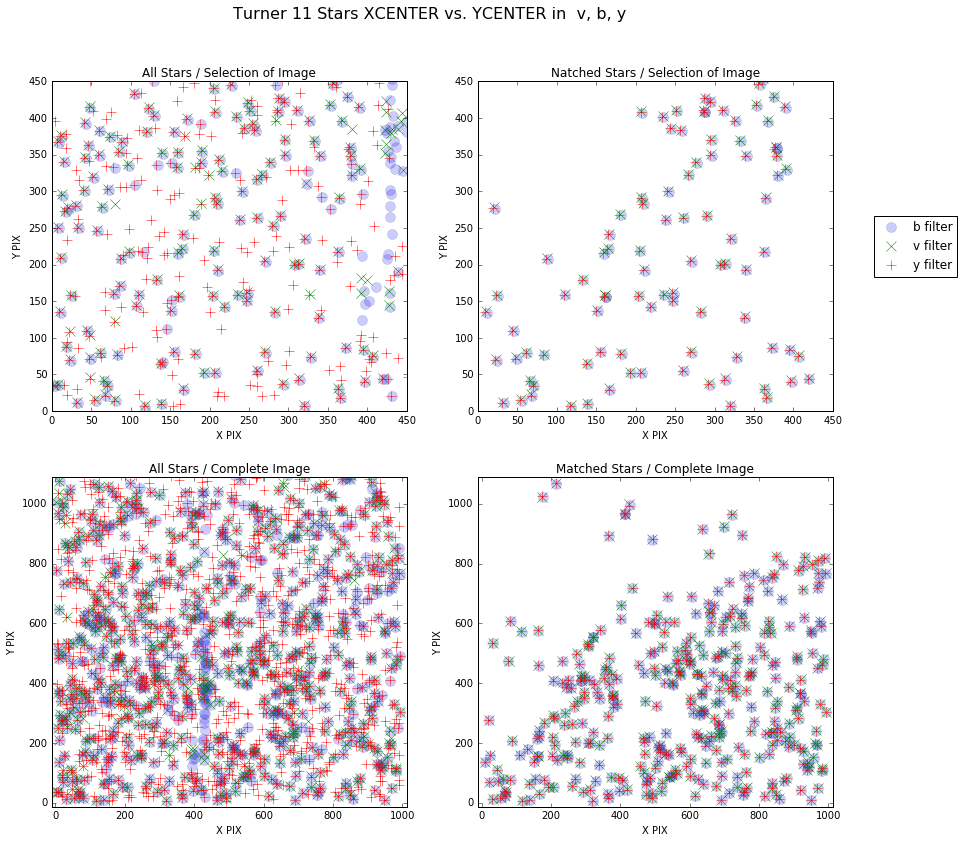

In [14]:
#Check that stars were matched correctly, by visual inspection.

fig,ax = plt.subplots(2,2)
fig.set_size_inches(14,6.5*2)
fig.suptitle(cluster_title + ' Stars XCENTER vs. YCENTER in  v, b, y',fontsize='16')

ax[0,0].set_title('All Stars / Selection of Image')
ax[0,1].set_title('Natched Stars / Selection of Image')
ax[1,0].set_title('All Stars / Complete Image')
ax[1,1].set_title('Matched Stars / Complete Image')

plotvalue=[0,1]

for plotval in plotvalue:
    ax[0,plotval].set_xlim(0,450)
    ax[0,plotval].set_ylim(0,450)
    ax[1,plotval].set_xlim(Phot['y_XCENTER'].min()-20,Phot['y_XCENTER'].max()+20)
    ax[1,plotval].set_ylim(Phot['y_YCENTER'].min()-20,Phot['y_YCENTER'].max()+20)
    
    ax[plotval,0].set_xlabel('X PIX')
    ax[plotval,0].set_ylabel('Y PIX')
    ax[plotval,0].plot(als_b['XCENTER'],als_b['YCENTER'],marker='o',markersize='10',linestyle='',alpha=.2,label='b filter');
    ax[plotval,0].plot(als_v['XCENTER'],als_v['YCENTER'],marker='x',markersize='10',linestyle='',label='v filter');
    ax[plotval,0].plot(als_y['XCENTER'],als_y['YCENTER'],marker='+',markersize='10',linestyle='',label='y filter');
    
    ax[plotval,1].set_xlabel('X PIX')
    ax[plotval,1].set_ylabel('Y PIX')
    ax[plotval,1].plot(Phot['b_XCENTER'],Phot['b_YCENTER'],marker='o',markersize='10',linestyle='',alpha=.2,label='b filter');
    ax[plotval,1].plot(Phot['v_XCENTER'],Phot['v_YCENTER'],marker='x',markersize='10',linestyle='',label='v filter');
    ax[plotval,1].plot(Phot['y_XCENTER'],Phot['y_YCENTER'],marker='+',markersize='10',linestyle='',label='y filter');
    ax[0,1].legend(loc='center left', bbox_to_anchor=(1.1,.5),numpoints=1);
fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_selectstars.jpg', bbox_inches='tight')

In [15]:
#Reading in Tilegal. Note Program will announce completion.
if verbose_absolute == 'yes':
    !cat $cluster'_TRILEGAL.dat' | wc
Trilegal_unindexed = QTable.read(cluster +'_TRILEGAL.dat', format='ascii')

!say "try legal has finished running"
#This can take a long time if there are a large # of stars

cat: Turner11_dao_TRILEGAL.dat: No such file or directory
       0       0       0


IOError: [Errno 2] No such file or directory: 'Turner11_dao_TRILEGAL.dat'

In [ ]:
ID = QTable()
ID['id'] = range(len(Trilegal_unindexed)+1)[1:]
Trilegal = hstack([ID,Trilegal_unindexed],join_type='outer')
del ID

Trilegal['b-y'] = Trilegal['b']-Trilegal['y']

if verbose_absolute == 'yes':
    print '# Trilegal Stars:', len(Trilegal)

In [ ]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(21,6.5)

fig.suptitle(cluster_title + ' Color Magnitude Diagrams',fontsize='16')

x = Phot['v_MAG']-Phot['y_MAG']
y = Phot['y_MAG']
x_tri = Trilegal['v']-Trilegal['y']
y_tri = Trilegal['y']

ax[0].set_title(cluster_title + ' Stars')
ax[0].set_xlabel('v - y')
ax[0].set_ylabel('y')
ax[0].invert_yaxis()
ax[0].plot(x,y,marker='x',markersize='2',linestyle='',c='g');

ax[1].set_title('Model TRILEGAL Stars')
ax[1].set_xlabel('v - y')
ax[1].set_ylabel('y')
ax[1].invert_yaxis()
ax[1].plot(x_tri,y_tri,marker='x',markersize='2',linestyle='',alpha=.2,c='b');

ax[2].set_title(cluster_title + ' Stars & Model TRILEGAL Stars')
ax[2].set_xlabel('v - y')
ax[2].set_ylabel('y')
ax[2].invert_yaxis()
ax[2].plot(x_tri,y_tri,marker='x',markersize='2',linestyle='',alpha=.2,label='TRILEGAL',c='b');
ax[2].plot(x,y,marker='x',markersize='2',linestyle='',label=cluster,c='g');

ax[2].legend(loc='center left', bbox_to_anchor=(1,.5),numpoints=1,markerscale=9,framealpha=1);

fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_colmag_tri_cluster.jpg', bbox_inches='tight')

In [ ]:
# To build upper and lower y and b-y limits for each star:
id_phot = Phot['id'] #following renaming convention used in Clean3201
ymag_phot = Phot['y_MAG']
colby_phot = Phot['b_MAG']-Phot['y_MAG']
sigy_phot = Phot['y_MERR']
sigby_phot = np.sqrt(Phot['b_MERR']**2+Phot['y_MERR']**2)

ymag_tri = Trilegal['y']
colby_tri = Trilegal['b-y']

n_stars = len(Phot)
n_f_stars = len(Trilegal)

ratio = 1
        
# y - determining ry
edge_y_phot = ratio*2 * sigy_phot
for i in range(n_stars):
    if .2 > edge_y_phot[i]:
        edge_y_phot[i] = ratio * .2

# b-y - determining rby
edge_by_phot = ratio*2 * sigby_phot
for i in range(n_stars):
    if .1 > edge_by_phot[i]:
        edge_by_phot[i] = ratio * .1

# Final upper and lower limits determined and added to Limits table:
u_limit_y_phot = ymag_phot + edge_y_phot
l_limit_y_phot = ymag_phot - edge_y_phot
u_limit_by_phot = colby_phot + edge_by_phot
l_limit_by_phot = colby_phot - edge_by_phot

printlist = [id_phot[:3], ymag_phot[:3], colby_phot[:3], sigy_phot[:3], sigby_phot[:3],
             'tri:',ymag_tri[:3],'tri:',colby_tri[:3],'edge_y_phot:', edge_y_phot[:3],
             'edge_by_phot:', edge_by_phot[:3],'u_limit_y_phot:',u_limit_y_phot[:3],
             'l_limit_y_phot:',l_limit_y_phot[:3],'u_limit_by_phot:',u_limit_by_phot[:3],
             'l_limit_by_phot:',l_limit_by_phot[:3]]

if verbose == 'yes':
    for freevar in enumerate(printlist):
        print freevar[1]

In [ ]:
#Finding # local PHOT stars around all PHOT Stars
start_time_phot = time.time()

n = 10
n = n_stars
n_near_y_by = []
for star in range(n):
    a = 0
    l_limit_y_phot_star = l_limit_y_phot[star]
    u_limit_y_phot_star = u_limit_y_phot[star]
    l_limit_by_phot_star = l_limit_by_phot[star]
    u_limit_by_phot_star = u_limit_by_phot[star]
    for near in range(n_stars):
        mag = ymag_phot[near]
        range_1 = (mag > l_limit_y_phot_star)
        if range_1 == True:
            range_3 = (mag < u_limit_y_phot_star)
            if range_3 == True:
                col = colby_phot[near]
                range_2 = (col > l_limit_by_phot_star)
                if range_2 == True:
                    range_4 = (col < u_limit_by_phot_star)
                    if range_4 == True:
                        a += 1.0
    n_near_y_by.append(a)

end_time_phot = time.time()
!say "foat star match has finished running"

In [ ]:
backup_phot = n_near_y_by
n_near_y_by = np.array(n_near_y_by, dtype='f')  #turning array into dtype float
# n_near_y_by = backup_phot   # use this line to use backup n_near instead of new n_near, make sure to # previous 2 lines

d_t1 = end_time_phot - start_time_phot
if verbose_absolute == 'yes':
    print "PHOT"
    print '#:', np.array(n_near_y_by, dtype='i'), '   mean:', n_near_y_by.mean()
    print '%:',n_near_y_by/n_stars, '   mean:', (n_near_y_by/n_stars).mean()
    print "Iterations:      %g" % len(n_near_y_by), "/ %g" % n_stars
    print "Elapsed time:    %g seconds" % d_t1
    print "Rate:            %g sec/range" % (d_t1/n)
    print "Est Total Time:  %g minutes" % (n_stars/n * d_t1/60), " / %g seconds" % (n_stars / n * d_t1), " / %g hours" % (n_stars/n * d_t1/3660) 

In [ ]:
#LET'S BREAK THIS CELL
##TESTING GROUND BEWARE OF FAILURE

#Finding # local TRILEGAL stars around all PHOT Stars

start_time_tri = time.time()

#these are n_stars by n_f_stars arrays, each filled limits arrays
l_limit_y_phot_all = np.full(n_stars, np.array(l_limit_y_phot))
# u_limit_y_phot_all = np.full((n_stars, n_stars), np.array(u_limit_y_phot))

print l_limit_y_phot_all
print u_limit_y_phot_all

# print ymag_tri > l_limit_y_phot_all


# print np.where((ymag_tri>l_limit_y_phot_all)&(ymag_tri<u_limit_y_phot_all))

# print np.where((ymag_tri[0]>l_limit_y_phot)&(ymag_tri[0]<u_limit_y_phot))
# print len(np.where((ymag_tri[0]>l_limit_y_phot)&(ymag_tri[0]<u_limit_y_phot))[0])


# m = 10
# m = n_stars
# for star in range(m):
#     a = 0
#     l_limit_y_phot_star = l_limit_y_phot[star]
#     u_limit_y_phot_star = u_limit_y_phot[star]
#     l_limit_by_phot_star = l_limit_by_phot[star]
#     u_limit_by_phot_star = u_limit_by_phot[star]
#     for near in range(n_f_stars):
#         mag = ymag_tri[near]
#         range_1 = (mag > l_limit_y_phot_star)
#         if range_1 == True:
#             range_3 = (mag < u_limit_y_phot_star)
#             if range_3 == True:
#                 col = colby_tri[near]
#                 range_2 = (col > l_limit_by_phot_star)
#                 if range_2 == True:
#                     range_4 = (col < u_limit_by_phot_star)
#                     if range_4 == True:
#                         a += 1.0

end_time_tri = time.time()
#!say "try legal star match has finished running"

##TESTING GROUND BEWARE OF CONTINUED FAILURE

In [ ]:
#Finding # local TRILEGAL stars around all PHOT Stars
start_time_tri = time.time()

m = 10
m = n_stars
n_near_y_by_tri = []
for star in range(m):
    a = 0
    l_limit_y_phot_star = l_limit_y_phot[star]
    u_limit_y_phot_star = u_limit_y_phot[star]
    l_limit_by_phot_star = l_limit_by_phot[star]
    u_limit_by_phot_star = u_limit_by_phot[star]
    for near in range(n_f_stars):
        mag = ymag_tri[near]
        range_1 = (mag > l_limit_y_phot_star)
        if range_1 == True:
            range_3 = (mag < u_limit_y_phot_star)
            if range_3 == True:
                col = colby_tri[near]
                range_2 = (col > l_limit_by_phot_star)
                if range_2 == True:
                    range_4 = (col < u_limit_by_phot_star)
                    if range_4 == True:
                        a += 1.0
    n_near_y_by_tri.append(a)

end_time_tri = time.time()
!say "try legal star match has finished running"

In [ ]:
n_near_y_by_tri = np.array(n_near_y_by_tri, dtype='f')  #turning array into dtype float
backup_tri = n_near_y_by_tri
# n_near_y_by_tri = backup_tri   # use this line to use backup n_near instead of new n_near, make sure to # previous 2 lines

d_t2 = end_time_tri - start_time_tri
if verbose_absolute == 'yes':
    print "TRILEGAL"
    print "#:", np.array(n_near_y_by_tri, dtype='i'), '   mean:', n_near_y_by_tri.mean()
    print "%:",n_near_y_by_tri/n_f_stars, (n_near_y_by_tri/n_f_stars).mean()
    print "Iterations:      %g" % len(n_near_y_by_tri), "/ %g" % n_stars
    print "Elapsed time:    %g seconds" % d_t2
    print "Rate:            %g sec/range" % (d_t2/m)
    print "Est Total time:  %g minutes" %(n_stars/m * d_t2/60), " / %g seconds" % (n_stars / m * d_t2), " / %g hours" % (n_stars/m * d_t2/3660)

In [ ]:
Limits = QTable()
Limits['id'] = id_phot
Limits['ymag'] = ymag_phot
Limits['colby'] = colby_phot
Limits['sigy'] = sigy_phot
Limits['sigby'] = colby_phot
Limits['edge_y'] = edge_y_phot
Limits['edge_by'] = edge_by_phot
Limits['u_limit_y'] = u_limit_y_phot
Limits['l_limit_y'] = l_limit_y_phot
Limits['u_limit_by'] = u_limit_by_phot
Limits['l_limit_by'] = l_limit_by_phot
Limits['n_near_phot'] = n_near_y_by            # variable NGC - phot
Limits['n_near_trilegal'] = n_near_y_by_tri    # variable NOFF - trilegal
np.savetxt(path_out + cluster +'_'+ str(t.date())+'_backup_limits.txt', Limits, delimiter=',', fmt='%s',
           header='id ymag colby sigy sigby edge_y edge_by u_limit_y l_limit_y u_limit_by l_limit_by n_near_phot n_near_trilegal')
if verbose =='yes':
    print Limits[:3]

In [ ]:
alpha=0.38   #origional value from CLEAN3201

ngc = np.array(n_near_y_by, dtype='f')     # NGC   Phot
NOFF = np.array(n_near_y_by_tri, dtype='f') # NOFF  trilegal

glob95 = ngc*((1-(1/(9*ngc))-(1.645/(3*np.sqrt((ngc))))+(0.031*(ngc**(-2.5))))**3)
field84 = (NOFF+1)*((1.0-1.0/(9.*(NOFF+1)))+( 1./(3.*np.sqrt(NOFF+1))))**3   

val = (alpha*field84)/glob95
for i in range(len(val)):
    if val[i] > 1.0:
          val[i]=1.0

p = 1 - val

In [ ]:
def random(ix,iy,iz):
    random = []
    for i in range(len(ix)):
        x = ix[i]
        y = iy[i]
        z = iz[i]
        x = 171 * (x%177) -  2 * (x/177)
        y = 171 * (y%176) - 35 * (y/176)
        z = 170 * (z%178) - 63 * (z/178)

        if x < 0:
            x += 30269
        if y < 0:
            y += 30307
        if z < 0:
            z += 30323
        random.append((x/30269. + y/30307. + z/30323.) % 1.0)
    return random

In [ ]:
ix=abs(100*field84)
iy=abs(200*glob95)
iz=abs(50*val)

prand=random(ix,iy,iz)

k = 0
for i in range(n_stars):
    if NOFF[i] == 0:
        p[i] = 1.000
        prand[i] = 0.0
        k+=1

if verbose_absolute == 'yes':
    print "# stars corrected", k

member = np.zeros(n_stars)
k = 0
for i in range(n):
    if prand[i] < p[i]:
        member[i] = 1
        k+=1
    else:
        member[i] = 0
        
if verbose_absolute == 'yes':
    print '# members    ', k
    print '# non-members', n_stars-k
    print '# total stars', n_stars

In [ ]:
Probability = QTable()
Probability['id'] = id_phot
Probability['NGC'] = n_near_y_by     # NGC   Phot
Probability['NOFF'] = n_near_y_by_tri # NOFF  trilegal
Probability['glob95'] = glob95
Probability['field84'] = field84
Probability['val'] = val
Probability['p'] = 1 - val
Probability['member'] = member
np.savetxt(path_out + cluster +'_'+ str(t.date())+'_backup_probability.txt', Probability, delimiter=',', fmt='%s',
           header='id NGC NOFF glob95 field84 val p member')
if verbose_absolute == 'yes':
    print Probability[:3]

In [ ]:
Phot['p'] = p
Phot['member'] = member

fieldstars = Phot[np.where(member == 0)[0]]
outcluster = Phot[np.where(member == 1)[0]]
out3sig = Phot[np.where((member == 1) & (p >.95))[0]]

fieldstars.write(path_out + cluster +'_'+ str(t.date())+'_fieldstars.txt', format='ascii')
outcluster.write(path_out + cluster +'_'+ str(t.date())+ '_outcluster.txt', format='ascii')
out3sig.write(path_out + cluster +'_'+ str(t.date())+ '_out3sig.txt', format='ascii')
if verbose_absolute == 'yes':
    print cluster + ' outcluster   '
    print '  n stars  ', len(outcluster), '/', n_stars
    print '  avg p    ', outcluster['p'].mean()
    print cluster + ' out3sig      '
    print '  n stars  ', len(out3sig), '/', n_stars
    print '  avg p    ', out3sig['p'].mean()
    print cluster + ' fieldstars   '
    print '  n stars: ', len(fieldstars), '/', n_stars
    print '  avg p:   ', fieldstars['p'].mean()

# Color-Mag and Metallicity PLOTS

In [ ]:
fig,ax = plt.subplots(1,1)
fig.tight_layout()
fig.set_size_inches(10,10)

# ax.set_xlim(-5,8)
# ax.set_ylim(-1,6)

x = Phot['v_MAG']-Phot['y_MAG']
x_cluster = outcluster['v_MAG']-outcluster['y_MAG']
x_out3sig = out3sig['v_MAG']-out3sig['y_MAG']
x_field = fieldstars['v_MAG']-fieldstars['y_MAG']

y = Phot['y_MAG']
y_cluster = outcluster['y_MAG']
y_out3sig = out3sig['y_MAG']
y_field = fieldstars['y_MAG']

xerrors = (Phot['v_MERR']**2+Phot['y_MERR']**2)**.5
yerrors = Phot['y_MERR']

ax.errorbar(x, y, yerr=yerrors, linestyle='none', color='k',alpha=.1,label='')
ax.errorbar(x, y, xerr=xerrors, linestyle='none', color='k',alpha=.1,label='')

ax.set_title(cluster_title + ' / Color-Mag')
ax.set_xlabel('v - y')
ax.set_ylabel('y')
ax.invert_yaxis()
ax.plot(x,y,marker='x',markersize='2',linestyle='',label='Field and Member Stars');
ax.plot(x_cluster,y_cluster,marker='x',markersize='4',linestyle='',label='Cluster Members');
ax.plot(x_out3sig,y_out3sig,marker='x',markersize='4',linestyle='',label='Cluster Members - 3 sigma');

ax.legend(loc='center left', bbox_to_anchor=(1,.5),numpoints=1);

fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_colmag_single.jpg', bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
fig.tight_layout()

# ax[0].set_xlim(-1,5)
# ax[0].set_ylim(13,28)
# ax[1].set_xlim(-1,5)
# ax[1].set_ylim(13,28)
# ax[2].set_xlim(-1,5)
# ax[2].set_ylim(13,28)

x = Phot['v_MAG']-Phot['y_MAG']
x_cluster = outcluster['v_MAG']-outcluster['y_MAG']
x_out3sig = out3sig['v_MAG']-out3sig['y_MAG']
x_field = fieldstars['v_MAG']-fieldstars['y_MAG']

y = Phot['y_MAG']
y_cluster = outcluster['y_MAG']
y_out3sig = out3sig['y_MAG']
y_field = fieldstars['y_MAG']

xerrors = (Phot['v_MERR']**2+Phot['y_MERR']**2)**.5
yerrors = Phot['y_MERR']
xerrors_cluster = (outcluster['v_MERR']**2+outcluster['y_MERR']**2)**.5
yerrors_cluster = outcluster['y_MERR']
xerrors_out3sig = (out3sig['v_MERR']**2+out3sig['y_MERR']**2)**.5
yerrors_out3sig = out3sig['y_MERR']
xerrors_field = (fieldstars['v_MERR']**2+fieldstars['y_MERR']**2)**.5
yerrors_field = fieldstars['y_MERR']

# ax[0].errorbar(x, y, yerr=yerrors, linestyle='none', color='k',alpha=.1)
# ax[0].errorbar(x, y, xerr=xerrors, linestyle='none', color='k',alpha=.1)
# ax[1].errorbar(x_cluster, y_cluster, yerr=yerrors_cluster, linestyle='none', color='k',alpha=.1)
# ax[1].errorbar(x_cluster, y_cluster, xerr=xerrors_cluster, linestyle='none', color='k',alpha=.1)
# ax[2].errorbar(x_out3sig, y_out3sig, yerr=yerrors_out3sig, linestyle='none', color='k',alpha=.1)
# ax[2].errorbar(x_out3sig, y_out3sig, xerr=xerrors_out3sig, linestyle='none', color='k',alpha=.1)

ax[0].set_title(cluster_title + ' / Color-Mag / All Stars')
ax[0].set_xlabel('v - y')
ax[0].set_ylabel('y')
ax[0].invert_yaxis()
ax0 = ax[0].plot(x,y,marker='x',markersize='2',linestyle='',color='b',label='Field and Member Stars');

ax[1].set_title(cluster_title + ' / Color-Mag / Cluster Stars')
ax[1].set_xlabel('v - y')
ax[1].set_ylabel('y')
ax[1].invert_yaxis()
ax1 = ax[1].plot(x_cluster,y_cluster,marker='x',markersize='2',linestyle='',color='g',label='Cluster Members');

ax[2].set_title(cluster_title + ' / Color-Mag / $3\sigma$ Stars')
ax[2].set_xlabel('v - y')
ax[2].set_ylabel('y')
ax[2].invert_yaxis()
ax2 = ax[2].plot(x_out3sig,y_out3sig,marker='x',markersize='2',linestyle='',color='r',label='Cluster Members - 3 Sigma');

ax[0].legend(loc='lower left', numpoints=1);
ax[1].legend(loc='lower left', numpoints=1);
ax[2].legend(loc='lower left', numpoints=1);

fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_colmag_triple.jpg', bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,1)
fig.tight_layout()
fig.set_size_inches(10,10)

x = Phot['b_MAG']-Phot['y_MAG']
x_cluster = outcluster['b_MAG']-outcluster['y_MAG']
x_out3sig = out3sig['b_MAG']-out3sig['y_MAG']
x_field = fieldstars['b_MAG']-fieldstars['y_MAG']

y = Phot['v_MAG']-Phot['b_MAG'] - (Phot['b_MAG']-Phot['y_MAG'])
y_cluster = outcluster['v_MAG']-outcluster['b_MAG'] - (outcluster['b_MAG']-outcluster['y_MAG'])
y_out3sig = out3sig['v_MAG']-out3sig['b_MAG'] - (out3sig['b_MAG']-out3sig['y_MAG'])
y_field = fieldstars['v_MAG']-fieldstars['b_MAG'] - (fieldstars['b_MAG']-fieldstars['y_MAG'])

xerrors = (Phot['b_MERR']**2+Phot['y_MERR']**2)**.5
yerrors = (Phot['v_MERR']**2+ Phot['y_MERR']**2)**.5

ax.errorbar(x, y, yerr=yerrors, linestyle='none', color='k',alpha=.1,label='')
ax.errorbar(x, y, xerr=xerrors, linestyle='none', color='k',alpha=.1,label='')

ax.set_title(cluster_title + ' / Metallicity')
ax.set_xlabel('b - y')
ax.set_ylabel('$m_{1}$')
ax.plot(x,y,marker='x',markersize='2',linestyle='',label='Field and Member Stars');
ax.plot(x_cluster,y_cluster,marker='x',markersize='4',linestyle='',label='Cluster Members');
ax.plot(x_out3sig,y_out3sig,marker='x',markersize='4',linestyle='',label='Cluster Members - 3 sigma');

ax.legend(loc='center left', bbox_to_anchor=(1,.5),numpoints=1);

ax.set_xlim(-.5,3)
ax.set_ylim(-2,3)

fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_metallicity_single.jpg', bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
fig.tight_layout()

x = Phot['b_MAG']-Phot['y_MAG']
x_cluster = outcluster['b_MAG']-outcluster['y_MAG']
x_out3sig = out3sig['b_MAG']-out3sig['y_MAG']
x_field = fieldstars['b_MAG']-fieldstars['y_MAG']

y = Phot['v_MAG']-Phot['b_MAG'] - (Phot['b_MAG']-Phot['y_MAG'])
y_cluster = outcluster['v_MAG']-outcluster['b_MAG'] - (outcluster['b_MAG']-outcluster['y_MAG'])
y_out3sig = out3sig['v_MAG']-out3sig['b_MAG'] - (out3sig['b_MAG']-out3sig['y_MAG'])
y_field = fieldstars['v_MAG']-fieldstars['b_MAG'] - (fieldstars['b_MAG']-fieldstars['y_MAG'])

xerrors = (Phot['b_MERR']**2+Phot['y_MERR']**2)**.5
yerrors = (Phot['v_MERR']**2+ Phot['y_MERR']**2)**.5
xerrors_cluster = (outcluster['b_MERR']**2+outcluster['y_MERR']**2)**.5
yerrors_cluster = (outcluster['v_MERR']**2+ outcluster['y_MERR']**2)**.5
xerrors_out3sig = (out3sig['b_MERR']**2+out3sig['y_MERR']**2)**.5
yerrors_out3sig = (out3sig['v_MERR']**2+out3sig['y_MERR']**2)**.5
xerrors_field = (fieldstars['b_MERR']**2+fieldstars['y_MERR']**2)**.5
yerrors_field = (fieldstars['v_MERR']**2+fieldstars['y_MERR']**2)**.5

ax[0].errorbar(x, y, yerr=yerrors, linestyle='none', color='k',alpha=.1,label='')
ax[0].errorbar(x, y, xerr=xerrors, linestyle='none', color='k',alpha=.1,label='')
ax[1].errorbar(x_cluster, y_cluster, yerr=yerrors_cluster, 
               linestyle='none', color='k',alpha=.1,label='')
ax[1].errorbar(x_cluster, y_cluster, xerr=xerrors_cluster, 
               linestyle='none', color='k',alpha=.1,label='')
ax[2].errorbar(x_out3sig, y_out3sig, yerr=yerrors_out3sig, 
               linestyle='none', color='k',alpha=.1,label='')
ax[2].errorbar(x_out3sig, y_out3sig, xerr=xerrors_out3sig, 
               linestyle='none', color='k',alpha=.1,label='')

ax[0].set_title(cluster_title + ' / Metallicity')
ax[0].set_xlabel('b - y')
ax[0].set_ylabel('$m_{1}$')
ax[0].plot(x,y,marker='x',markersize='1',linestyle='',color='b',label='Field and Member Stars');

ax[1].set_title(cluster_title + ' / Metallicity')
ax[1].set_xlabel('b - y')
ax[1].set_ylabel('$m_{1}$')
ax[1].plot(x_cluster,y_cluster,marker='x',markersize='2',linestyle='',color='g',label='Cluster Members');

ax[2].set_title(cluster_title + ' / Metallicity')
ax[2].set_xlabel('b - y')
ax[2].set_ylabel('$m_{1}$')
ax[2].plot(x_out3sig,y_out3sig,marker='x',markersize='4',linestyle='',color='r',label='Cluster Members - 3 sigma');

ax[0].set_xlim(-.5,3)
ax[0].set_ylim(-2,3)
ax[1].set_xlim(-.5,3)
ax[1].set_ylim(-2,3)
ax[2].set_xlim(-.5,3)
ax[2].set_ylim(-2,3)

ax[0].legend(loc='lower left', numpoints=1);
ax[1].legend(loc='lower left', numpoints=1);
ax[2].legend(loc='lower left', numpoints=1);

fig.savefig(path_out + cluster +'_'+ str(t.date()) +'_plot_metallicity_triple.jpg', bbox_inches='tight')